In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 전처리 후 새로운 데이터프레임으로 저장 > 'eda.csv'
1. 결측치 제거
2. 이상치 제거
- passenger_count > 6인 데이터 삭제
- pickup_latitude, dropoff_latitude(위도) : -90~90으로 설정, 0이하 삭제, 뉴욕의 위도 범위 벗어나는 데이터(39이하, 46이상) 삭제
- pickup_longitude, dropoff_longitude(경도) : -180~180으로 설정, 0이상 삭제, 뉴욕의 경도 범위 벗어나는 데이터(-80이하, -71이상) 삭제
- fare_amount <= 0인 데이터 삭제

In [6]:
eda_df = pd.read_csv("E:\eda.csv")

In [10]:
eda_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
eda_df.shape

(54268870, 8)

#### > 전처리 후 데이터 54,268,870개
- 전처리 과정에서 1,154,986개 삭제 (전처리 전 : 55,423,856개)

In [12]:
eda_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


======================================================================================================================

### 1. 파생변수 - 날짜데이터(pickup_datetime) 자르기

In [13]:
eda_df['time'] = pd.to_datetime(eda_df.pickup_datetime, format='%Y-%m-%d %H:%M:%S UTC')

In [14]:
# 날짜 추출하기
eda_df['log_date'] = eda_df['time'].dt.date
 
# 시간 추출하기
eda_df['log_time'] = eda_df['time'].dt.time
 
# 시 추출하기
eda_df['log_hour'] = eda_df['time'].dt.hour
 
# 분 추출하기
eda_df['log_min'] = eda_df['time'].dt.minute

In [16]:
# 연도 추출하기
eda_df['log_year'] = eda_df['time'].dt.year

# 월 추출하기
eda_df['log_month'] = eda_df['time'].dt.month

# 일 추출하기
eda_df['log_day'] = eda_df['time'].dt.day

In [18]:
eda_df.iloc[:5, 8:]

,time,log_date,log_time,log_hour,log_min,log_year,log_month,log_day
0,2009-06-15 17:26:21,2009-06-15,17:26:21,17,26,2009,6,15
1,2010-01-05 16:52:16,2010-01-05,16:52:16,16,52,2010,1,5
2,2011-08-18 00:35:00,2011-08-18,00:35:00,0,35,2011,8,18
3,2012-04-21 04:30:42,2012-04-21,04:30:42,4,30,2012,4,21
4,2010-03-09 07:51:00,2010-03-09,07:51:00,7,51,2010,3,9


#### 1-1. 시간 변수(log_hour) -> 그룹화 : 7to15, 16to19, 20to6 (이진변수 생성)

In [ ]:
# 기본요금은 $2.50에 총 $0.80의 추가 요금
# 5분의 1마일당, 혹은 교통 체증 시 60초당 $0.50이 가산
# 택시에 4명까지 탈 수 O
# 20:00부터 06:00까지 $0.50를 추가로 지불
# 월요일부터 금요일 16:00~20:00까지 교통체증이 있는 시간대에도 $1의 할증

1) 07시 00분 ~ 15시 59분 > 할증 x

2) 16시 00분 ~ 19시 59분 > 할증 o

3) 20시 00분 ~ 06시 59분 > 할증 o

In [19]:
def is_7to15(x):
    if (x >= 7) & (x <= 15):
        return 1
    else:
        return 0

In [20]:
eda_df['7to15'] = eda_df['log_hour'].apply(is_7to15)

In [21]:
def is_16to19(x):
    if (x >= 16) & (x < 20):
        return 1
    else:
        return 0

In [22]:
eda_df['16to19'] = eda_df['log_hour'].apply(is_16to19)

In [23]:
def is_20to6(x):
    if (x >= 20) | (x <= 6):
        return 1
    else:
        return 0

In [24]:
eda_df['20to6'] = eda_df['log_hour'].apply(is_20to6)

In [25]:
eda_df.iloc[:5, 8:]

,time,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6
0,2009-06-15 17:26:21,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0
1,2010-01-05 16:52:16,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0
2,2011-08-18 00:35:00,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1
3,2012-04-21 04:30:42,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1
4,2010-03-09 07:51:00,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0


#### 1-2. 요일 추출 -> 주중과 주말로 구분 : weekday 변수 생성

In [26]:
# 요일[1,7]. 월요일(1) ~ 일요일(7)

eda_df['dayofweek'] = eda_df['time'].dt.strftime("%u")

In [29]:
eda_df.iloc[:5, 8:]

,time,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek
0,2009-06-15 17:26:21,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1
1,2010-01-05 16:52:16,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2
2,2011-08-18 00:35:00,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4
3,2012-04-21 04:30:42,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6
4,2010-03-09 07:51:00,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2


In [30]:
def is_weekday(x):
    if (int(x) < 6):
        return 1
    else:
        return 0

In [31]:
eda_df['weekday'] = eda_df['dayofweek'].apply(is_weekday)

In [32]:
eda_df.iloc[:5, 8:]

,time,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday
0,2009-06-15 17:26:21,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1
1,2010-01-05 16:52:16,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1
2,2011-08-18 00:35:00,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1
3,2012-04-21 04:30:42,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0
4,2010-03-09 07:51:00,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1


#### 1-3. 추가 요금(할증) 여부 : is_extracharge 변수 생성

In [ ]:
# 20:00부터 06:00까지 $0.50를 추가로 지불
# 월요일부터 금요일 16:00~20:00까지 교통체증이 있는 시간대에도 $1의 할증

- (eda_df['20to6'] == 1)
- (eda_df['weekday'] == 1) & (eda_df['16to19'] == 1)

In [33]:
eda_df['is_extracharge'] = 0

In [36]:
# 20시부터 6시까지

eda_df.loc[eda_df['20to6'] == 1, 'is_extracharge'] = 1

In [37]:
# 월~금 16시부터 20시까지

eda_df.loc[(eda_df['weekday'] == 1) & (eda_df['16to19'] == 1), 'is_extracharge'] = 1

In [38]:
eda_df.iloc[:5, 8:]

,time,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge
0,2009-06-15 17:26:21,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1
1,2010-01-05 16:52:16,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1
2,2011-08-18 00:35:00,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1
3,2012-04-21 04:30:42,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1
4,2010-03-09 07:51:00,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0


> 특정 값일 때 데이터프레임의 특정 칼럼에 값 넣기 : https://note.espriter.net/1326

> Name_1에 있는 값1을 10으로 변경하고자 할 경우 : https://pongdangstory.tistory.com/518

In [40]:
eda_df.iloc[:5, :]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009-06-15,...,26,2009,6,15,0,1,0,1,1,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010-01-05,...,52,2010,1,5,0,1,0,2,1,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011-08-18,...,35,2011,8,18,0,0,1,4,1,1
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012-04-21,...,30,2012,4,21,0,0,1,6,0,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010-03-09,...,51,2010,3,9,1,0,0,2,1,0


In [41]:
eda_df.shape

(54268870, 22)

### 여기까지 'eda3.csv' 파일로 저장

In [42]:
eda_df.to_csv("E:\eda3.csv")

=======================================================================================================================

### 샘플로 50개만 뽑기

In [50]:
sample_df = eda_df.sample(n=50)
sample_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge
20284129,2011-10-12 22:06:19.0000003,7.30,2011-10-12 22:06:19 UTC,-74.002566,40.714432,-73.998256,40.733870,1,2011-10-12 22:06:19,2011-10-12,...,6,2011,10,12,0,0,1,3,1,1
6626842,2013-05-15 16:57:32.0000001,8.50,2013-05-15 16:57:32 UTC,-73.971867,40.787121,-73.991137,40.765215,1,2013-05-15 16:57:32,2013-05-15,...,57,2013,5,15,0,1,0,3,1,1
41850853,2011-11-27 18:40:57.0000004,7.70,2011-11-27 18:40:57 UTC,-73.982024,40.778534,-73.968530,40.787453,1,2011-11-27 18:40:57,2011-11-27,...,40,2011,11,27,0,1,0,7,0,0
5977539,2009-12-15 19:23:57.0000002,8.10,2009-12-15 19:23:57 UTC,-73.986608,40.740306,-74.009891,40.748057,4,2009-12-15 19:23:57,2009-12-15,...,23,2009,12,15,0,1,0,2,1,1
14509447,2011-10-11 18:15:00.00000054,5.70,2011-10-11 18:15:00 UTC,-73.999812,40.733172,-74.001538,40.723460,1,2011-10-11 18:15:00,2011-10-11,...,15,2011,10,11,0,1,0,2,1,1
31573042,2014-05-21 12:24:02.0000002,34.00,2014-05-21 12:24:02 UTC,-73.984525,40.750934,-73.917491,40.868955,1,2014-05-21 12:24:02,2014-05-21,...,24,2014,5,21,1,0,0,3,1,0
4266122,2009-02-11 08:43:49.0000002,6.90,2009-02-11 08:43:49 UTC,-73.978625,40.747742,-73.976280,40.757070,1,2009-02-11 08:43:49,2009-02-11,...,43,2009,2,11,1,0,0,3,1,0
45582948,2014-06-13 08:18:00.00000033,51.83,2014-06-13 08:18:00 UTC,-73.999265,40.743965,-73.861765,40.768402,6,2014-06-13 08:18:00,2014-06-13,...,18,2014,6,13,1,0,0,5,1,0
34265924,2013-06-21 09:37:00.00000083,5.00,2013-06-21 09:37:00 UTC,-73.993350,40.729575,-74.002550,40.728340,5,2013-06-21 09:37:00,2013-06-21,...,37,2013,6,21,1,0,0,5,1,0
43651041,2015-06-25 18:28:18.0000005,14.00,2015-06-25 18:28:18 UTC,-73.982269,40.742580,-73.981209,40.759289,1,2015-06-25 18:28:18,2015-06-25,...,28,2015,6,25,0,1,0,4,1,1


In [52]:
pickup = sample_df[['pickup_longitude','pickup_latitude']]
pd.DataFrame(pickup)

dropoff = sample_df[['dropoff_longitude','dropoff_latitude']]
pd.DataFrame(dropoff)

,dropoff_longitude,dropoff_latitude
20284129,-73.998256,40.733870
6626842,-73.991137,40.765215
41850853,-73.968530,40.787453
5977539,-74.009891,40.748057
14509447,-74.001538,40.723460
31573042,-73.917491,40.868955
4266122,-73.976280,40.757070
45582948,-73.861765,40.768402
34265924,-74.002550,40.728340
43651041,-73.981209,40.759289


In [53]:
distance = []

In [54]:
from geopy.distance import distance

In [59]:
dist = []
for i in range(len(dropoff.index)):
    result = distance(pickup.values[i], dropoff.values[i]).m
    dist.append(result)
print(dist)

[767.6709143341144, 2254.127220737141, 1530.9274079820223, 2609.5049726883753, 355.61027551272457, 8321.503803209775, 388.7866080143348, 15364.611038104113, 1027.49922035815, 528.2707178646536, 754.473431250479, 1045.568726023074, 3016.2484023967304, 822.3101540621843, 5179.478453150305, 2486.349384692399, 904.4803517532237, 1414.2723650725898, 205.19279350993503, 2862.699693738706, 1488.593781924669, 1674.0887955917633, 1538.4854620372803, 2748.847433616334, 2914.5935366536105, 17088.228862343458, 8204.012974348248, 345.67398268780624, 5374.507932482132, 1155.5952763523849, 2139.362422958571, 14446.980265615566, 3163.299518386854, 0.0, 14.236896678966449, 330.67772093609204, 3451.2855149930633, 2897.1027320900207, 1594.7142081218906, 1013.2796517632472, 0.0, 1418.7784655218425, 392.0031060272058, 264.5067806765492, 7843.722366052055, 2604.7536569857407, 247.23879802947758, 943.5507680562116, 1017.9754666006362, 7137.102001010551]


In [60]:
type(dist)

list

In [61]:
sample_df['distance'] = dist

In [63]:
sample_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,distance
20284129,2011-10-12 22:06:19.0000003,7.30,2011-10-12 22:06:19 UTC,-74.002566,40.714432,-73.998256,40.733870,1,2011-10-12 22:06:19,2011-10-12,...,2011,10,12,0,0,1,3,1,1,767.670914
6626842,2013-05-15 16:57:32.0000001,8.50,2013-05-15 16:57:32 UTC,-73.971867,40.787121,-73.991137,40.765215,1,2013-05-15 16:57:32,2013-05-15,...,2013,5,15,0,1,0,3,1,1,2254.127221
41850853,2011-11-27 18:40:57.0000004,7.70,2011-11-27 18:40:57 UTC,-73.982024,40.778534,-73.968530,40.787453,1,2011-11-27 18:40:57,2011-11-27,...,2011,11,27,0,1,0,7,0,0,1530.927408
5977539,2009-12-15 19:23:57.0000002,8.10,2009-12-15 19:23:57 UTC,-73.986608,40.740306,-74.009891,40.748057,4,2009-12-15 19:23:57,2009-12-15,...,2009,12,15,0,1,0,2,1,1,2609.504973
14509447,2011-10-11 18:15:00.00000054,5.70,2011-10-11 18:15:00 UTC,-73.999812,40.733172,-74.001538,40.723460,1,2011-10-11 18:15:00,2011-10-11,...,2011,10,11,0,1,0,2,1,1,355.610276
31573042,2014-05-21 12:24:02.0000002,34.00,2014-05-21 12:24:02 UTC,-73.984525,40.750934,-73.917491,40.868955,1,2014-05-21 12:24:02,2014-05-21,...,2014,5,21,1,0,0,3,1,0,8321.503803
4266122,2009-02-11 08:43:49.0000002,6.90,2009-02-11 08:43:49 UTC,-73.978625,40.747742,-73.976280,40.757070,1,2009-02-11 08:43:49,2009-02-11,...,2009,2,11,1,0,0,3,1,0,388.786608
45582948,2014-06-13 08:18:00.00000033,51.83,2014-06-13 08:18:00 UTC,-73.999265,40.743965,-73.861765,40.768402,6,2014-06-13 08:18:00,2014-06-13,...,2014,6,13,1,0,0,5,1,0,15364.611038
34265924,2013-06-21 09:37:00.00000083,5.00,2013-06-21 09:37:00 UTC,-73.993350,40.729575,-74.002550,40.728340,5,2013-06-21 09:37:00,2013-06-21,...,2013,6,21,1,0,0,5,1,0,1027.499220
43651041,2015-06-25 18:28:18.0000005,14.00,2015-06-25 18:28:18 UTC,-73.982269,40.742580,-73.981209,40.759289,1,2015-06-25 18:28:18,2015-06-25,...,2015,6,25,0,1,0,4,1,1,528.270718


#### fare_amount와 distance 간의 상관관계

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

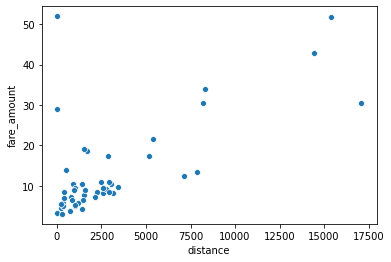

In [64]:
sns.scatterplot(data=sample_df, x='distance', y='fare_amount')

In [67]:
sample_df[['distance', 'fare_amount']].corr()

,distance,fare_amount
distance,1.000000,0.666951
fare_amount,0.666951,1.000000


<AxesSubplot:>

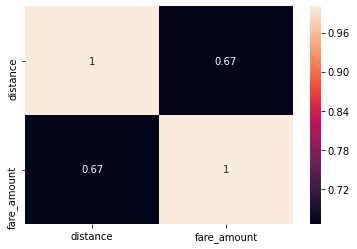

In [68]:
sns.heatmap(sample_df[['distance', 'fare_amount']].corr(), annot=True)

=======================================================================================================================

### ↓↓↓↓ 전체 데이터 여기서부터 실행하기 ↓↓↓↓

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from geopy.distance import distance

In [3]:
eda3_df = pd.read_csv("E:\eda3.csv")

In [18]:
eda3_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [19]:
eda3_df.iloc[:5,:]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009-06-15,...,26,2009,6,15,0,1,0,1,1,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010-01-05,...,52,2010,1,5,0,1,0,2,1,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011-08-18,...,35,2011,8,18,0,0,1,4,1,1
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012-04-21,...,30,2012,4,21,0,0,1,6,0,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010-03-09,...,51,2010,3,9,1,0,0,2,1,0


In [11]:
pickup = eda3_df[['pickup_longitude','pickup_latitude']]
pd.DataFrame(pickup)
pickup

,pickup_longitude,pickup_latitude
0,-73.844311,40.721319
1,-74.016048,40.711303
2,-73.982738,40.761270
3,-73.987130,40.733143
4,-73.968095,40.768008
...,...,...
54268865,-74.005272,40.740027
54268866,-73.957784,40.765530
54268867,-73.970505,40.752325
54268868,-73.980901,40.764629


In [12]:
dropoff = eda3_df[['dropoff_longitude','dropoff_latitude']]
pd.DataFrame(dropoff)
dropoff

,dropoff_longitude,dropoff_latitude
0,-73.841610,40.712278
1,-73.979268,40.782004
2,-73.991242,40.750562
3,-73.991567,40.758092
4,-73.956655,40.783762
...,...,...
54268865,-73.963280,40.762555
54268866,-73.951640,40.773959
54268867,-73.960537,40.797342
54268868,-73.870605,40.773963


In [25]:
distance = []

In [27]:
from geopy.distance import distance

In [28]:
dist = []
for i in range(len(dropoff.index)):
    result = distance(pickup.values[i], dropoff.values[i]).m
    dist.append(result)
print(dist)

KeyboardInterrupt: 

In [ ]:
type(dist)

In [ ]:
sample_df['distance'] = dist

#### fare과 distance 간의 상관관계

In [ ]:
sns.scatterplot(data=eda_df, x='distance', y='fare_amount')

In [ ]:
eda_df[['distance', 'fare_amount']].corr()

In [ ]:
sns.heatmap(eda_df[['distance', 'fare_amount']].corr(), annot=True)

======================================================================================================================

### 2-1. 추가변수 - 택시 개수, fare_amount(= 택시 하나에서 발생하는 운행 요금)

In [ ]:
## 승객들이 4명 단위로 나눠져서 택시 탑승 (1~4명은 한 팀, 5~6명은 두 팀으로 나눠짐)
## & 뒤에 산점도 확인하면 passenger_account는 fare_amount와 무관
## -> 'taxi_account', 'fare_amount_ontaxi' 추가 변수 생성
##    (taxi_account ; 택시 개수, fare_amount_ontaxi ; 택시 당 운행 요금 (= fare_amount / taxi_account))

승객 1 ~ 4명(taxi_df) / 승객 5 ~ 6명(taxi2_df)으로 그룹 나눠서 fare_amount 확인 

In [5]:
taxi2_df = eda3_df[eda3_df['passenger_count'] > 4]

In [9]:
taxi2_df['fare_amount'].describe()

count    4.992442e+06
mean     1.142110e+01
std      9.498152e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.290000e+01
max      3.128000e+02
Name: fare_amount, dtype: float64

In [6]:
taxi_df = eda3_df[eda3_df['passenger_count'] <= 4]

In [10]:
taxi_df['fare_amount'].describe()

count    4.927643e+07
mean     1.131887e+01
std      2.165317e+01
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

======================================================================================================================

### xgboost

- Extreme Gradient Boosting
- 병렬 처리로 학습, 분류 속도가 빠름
- 자체에 과적합 규제 기능으로 강한 내구성 지님
- 분류와 회귀영역에서 뛰어난 예측 성능을 발휘함
- Early Stopping(조기 종료) 기능
- 다양한 옵션을 제공하며 Customizing이 용이함

1. 일반 파라미터
2. 부스터 파라미터
3. 학습 과정 파라미터

#### 민감하게 조정해야하는 것

- booster 모양
- eval_metric(평가함수) / objective(목적함수)
- eta 
- L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
- L2 form

#### 과적합 방지를 위해 조정해야하는 것

- learning rate 낮추기 → n_estimators은 높여야함
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기

#### 하이퍼파라미터

In [31]:
!pip install xgboost

You should consider upgrading via the 'c:\users\jooya\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [32]:
import xgboost as xgb

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.1, max_delta_step=0, max_depth=5,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Sample code 1. XGBClassifier

# 모델 선언
model = xgb.XGBClassifier() 

# 모델 훈련
model.fit(x,y) 

# 모델 예측
y_pred = model.predict(X_test)

In [ ]:
# Sample code 2. XGBRegressor

# 모델 선언
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=False)

# 모델 예측
y_pred = my_model.predict(X_test) 

https://wooono.tistory.com/97